In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"t0b1amogh","key":"61c9f7199ddb1cbf962f77e777c18192"}'}

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle

In [3]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [01:44<00:00, 23.9MB/s]
100% 2.29G/2.29G [01:44<00:00, 23.5MB/s]


In [4]:
!unzip /content/chest-xray-pneumonia.zip -d pneumonia


Streaming output truncated to the last 5000 lines.
  inflating: pneumonia/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: pneumonia/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: pneumonia/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: pneumonia/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: pneumonia/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: pneumonia/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: pneumonia/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: pneumonia/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: pneumonia/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: pneumonia/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: pneumonia/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: pneumonia/chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: pneumonia/chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: pneumonia/chest_xray/train/NORMAL/IM-044

In [5]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import Sequential,layers
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization


# Data Preporcessing
    The line uses TensorFlow's image_dataset_from_directory function to create a training dataset from images stored in the specified directory ("/content/pneumonia/chest_xray/train").
    image_size=(256, 256) sets the target size for each image in the dataset to be 256x256 pixels.
    labels='inferred' means that the labels will be inferred from the subdirectories of the specified directory.
    label_mode='int' specifies that the labels should be treated as integers.
    batch_size=32 sets the number of samples to include in each batch during training.

In [6]:
train_data=tf.keras.utils.image_dataset_from_directory("/content/pneumonia/chest_xray/train",image_size=(256,256),labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,)
test_data=tf.keras.utils.image_dataset_from_directory("/content/pneumonia/chest_xray/test",image_size=(256,256),labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,)
val_data=tf.keras.utils.image_dataset_from_directory("/content/pneumonia/chest_xray/val",image_size=(256,256),labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,)

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


In general, these lines of code are related to preparing and processing data for training a machine learning model, specifically a neural network. Let's break down the purpose of each line:

Converting Dataset to NumPy Iterator:

data_iterator = train_data.as_numpy_iterator()

    Converts the TensorFlow dataset (train_data) into a NumPy iterator using as_numpy_iterator().
    This allows easy iteration over the dataset, retrieving batches of data as NumPy arrays.

Fetching a Batch of Data:

batch = data_iterator.next()

    Retrieves the next batch of data from the iterator.
    This batch contains a set of images and their corresponding labels.
    The batch variable holds the data that can be used for training or validation.

In [7]:
data_iterator=train_data.as_numpy_iterator()
batch=data_iterator.next()

In [8]:
#labels
class_names=train_data.class_names

The line class_names = train_data.class_names is used to obtain the class names associated with the labels in training dataset
 , particularly useful when  dealing with a classification problem, as it allows to map the predicted numerical labels to meaningful class names.

In [9]:
class_names

['NORMAL', 'PNEUMONIA']

In [10]:
for images, labels in val_data:
    # 'labels' will contain the class indices, you can map them to class names
    print(labels)
    class_labels=[class_names[i] for i in labels.numpy()]
    print(class_labels)


tf.Tensor([1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1], shape=(16,), dtype=int32)
['PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'NORMAL', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'NORMAL', 'NORMAL', 'NORMAL', 'PNEUMONIA']


Above code helps to inspect the actual class labels (numerical and corresponding class names) in the validation dataset. It's a useful step for understanding and verifying the data during the development.

In this code iteration is done over batches of data from the validation dataset.

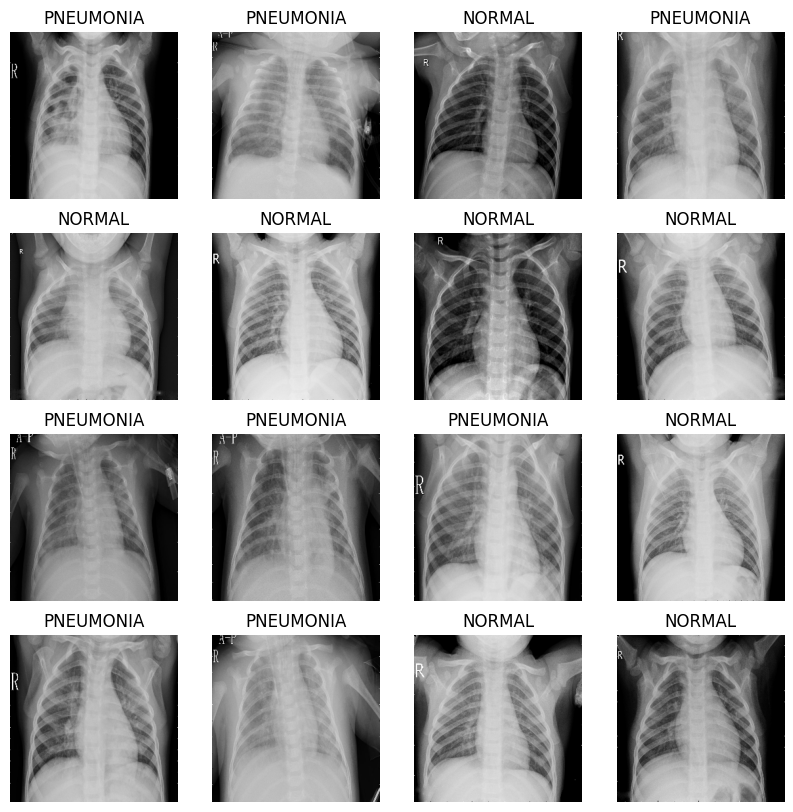

In [11]:
import matplotlib.pyplot as plt

def plot_images(images, labels, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(len(images)):
        plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

    plt.show()

for images, labels in val_data.take(1):
    plot_images(images, labels, class_names)


def plot_images(images, labels, class_names): Defines a function named plot_images that takes a batch of images, their labels, and class names as input.

plt.figure(figsize=(10, 10)): Creates a new figure for plotting with a specified size.

for i in range(len(images)):: Iterates through the images in the batch.

   plt.subplot(4, 4, i + 1): Creates subplots in a 4x4 grid, and i + 1 specifies the position of the current subplot.

  plt.imshow(images[i].numpy().astype("uint8")): Plots the image at index i in the batch. The astype("uint8") ensures the pixel values are treated as unsigned 8-bit integers.

  plt.title(class_names[labels[i]]): Sets the title of the subplot to the corresponding class name based on the label.

  plt.axis("off"): Turns off the axis labels and ticks for better visualization.

plt.show(): Displays the entire figure with subplots.

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,              # Rotate the image by a random degree between -10 and 10.
    width_shift_range=0.1,          # Shift the image horizontally by a fraction of its width.
    height_shift_range=0.1,         # Shift the image vertically by a fraction of its height.
    shear_range=0.1,                # Apply shear transformation to the image.
    zoom_range=0.1,                 # Zoom into the image by a random factor.
    horizontal_flip=True,           # Flip the image horizontally.
    brightness_range=[0.9, 2.0],    # Adjust the brightness of the image.
    channel_shift_range=10,         # Shift the color channels by a random value.
    fill_mode='nearest'             # Strategy for filling in newly created pixels after transformations.
)

# Data Augmentation
This function is designed to be used in a data pipeline during the training process. When applied to a batch of images and labels, it returns a tuple of augmented images and the original labels.

tf.py_function: Wraps a Python function into a TensorFlow op, allowing the use of arbitrary Python code in TensorFlow computational graphs.

lambda x, y: (datagen.flow(x, batch_size=len(x), shuffle=False).next(), y): A lambda function taking two arguments (images and labels) and returning a tuple. It applies the data augmentation using datagen.flow.

The batch_size=len(x) ensures that the entire batch is augmented together without shuffling. .next() gets the next batch of augmented images.

(images, labels): Input arguments to the lambda function.

(tf.float32, tf.int32): Specifies the output types of the augmented_images, where the first element is of type tf.float32 (for the images) and the second element is of type tf.int32 (for the labels).

In [13]:
def augment_images(images, labels):
    augmented_images = tf.py_function(
        lambda x, y: (datagen.flow(x, batch_size=len(x), shuffle=False).next(), y),
        (images, labels),
        (tf.float32, tf.int32)
    )
    return augmented_images

In [14]:
augmented_train_data = train_data.map(augment_images)
augmented_test_data = test_data.map(augment_images)
augmented_val_data = val_data.map(augment_images)

In [15]:
def plot_augmented_images(images, labels, class_names):
    num_images = len(images)
    num_rows = 4
    num_cols = 8

    plt.figure(figsize=(15, 8))
    for i in range(num_images):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

    plt.show()

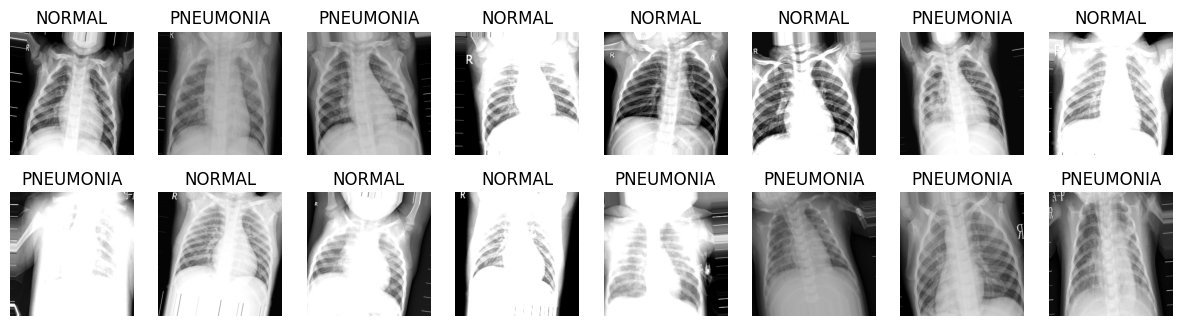

In [16]:
for images, labels in augmented_val_data.take(1):
    plot_augmented_images(images, labels, class_names)

In [17]:
def process(image, label):
  image = tf.cast(image/255., tf.float32)
  return image, label

train_data = train_data.map(process)
test_data = test_data.map(process)

In [19]:
len(train_data)

163

In [50]:
model=Sequential()


## convolutional neural network (CNN) model for binary classification

    Convolutional Layers: Conv2D layers with ReLU activation, responsible for learning spatial hierarchies of features.

    Batch Normalization: Applied after each Conv2D layer to normalize and stabilize activations.

    MaxPooling Layers: Used to down-sample the spatial dimensions of the input.

    Flatten Layer: Converts the 3D output to a 1D vector before the fully connected layers.

    Dense Layers with ReLU Activation: Fully connected layers with Rectified Linear Unit (ReLU) activation.

    Dropout Layers: Applied after Dense layers to introduce regularization by randomly dropping out a fraction of neurons during training. The specified dropout rates are 25%, 30%, and 25%.

    Output Layer: Dense layer with a sigmoid activation function for binary classification.

This architecture incorporates techniques like Batch Normalization and Dropout to enhance model training, prevent overfitting, and improve generalization performance

In [51]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation="relu", input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D())


model.add(Conv2D(64,(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D())


model.add(Conv2D(128,(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Flatten())

model.add(Dense(64,activation="relu"))
model.add(Dropout(0.25))

model.add(Dense(64,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(64,activation="relu"))
model.add(Dropout(0.25))

model.add(Dense(1,activation="sigmoid"))

In [52]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_9 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_10 (Ba  (None, 125, 125, 64)      256       
 tchNormalization)                                               
                                                     

Optimizer ("adam"): This specifies the optimization algorithm used during training. "Adam" is a popular optimization algorithm that adapts learning rates during training.

Loss Function ("binary_crossentropy"): This is the objective function the model seeks to minimize during training. For binary classification problems, "binary_crossentropy" is commonly used.

Metrics (["accuracy"]): This is a list of metrics used to evaluate the model's performance during training and testing. "accuracy" is a common metric for classification problems, measuring the fraction of correctly classified samples

In [53]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [54]:
model.fit(x=train_data,epochs=10,validation_data=val_data)

Epoch 1/10
163/163 [==============================] - 42s 229ms/step - loss: 0.6102 - accuracy: 0.8100 - val_loss: 1610.2299 - val_accuracy: 0.5000
Epoch 2/10
163/163 [==============================] - 37s 217ms/step - loss: 0.3678 - accuracy: 0.7970 - val_loss: 250.3520 - val_accuracy: 0.5000
Epoch 3/10
163/163 [==============================] - 37s 216ms/step - loss: 0.3719 - accuracy: 0.8198 - val_loss: 997.5515 - val_accuracy: 0.5000
Epoch 4/10
163/163 [==============================] - 37s 217ms/step - loss: 0.3125 - accuracy: 0.8629 - val_loss: 914.0857 - val_accuracy: 0.5000
Epoch 5/10
163/163 [==============================] - 41s 242ms/step - loss: 0.2553 - accuracy: 0.9137 - val_loss: 24.8430 - val_accuracy: 0.5625
Epoch 6/10
163/163 [==============================] - 39s 226ms/step - loss: 0.2215 - accuracy: 0.9323 - val_loss: 5311.7095 - val_accuracy: 0.5000
Epoch 7/10
163/163 [==============================] - 37s 216ms/step - loss: 0.2009 - accuracy: 0.9427 - val_loss: 16

In [55]:
model.save("pneumonia_detection_colored.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## The trained model (model) to make predictions. The predictions are then printed, and the image is displayed along with the predicted class.

In [56]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.utils import load_img, img_to_array
def predict_image(file_path):
    img = load_img(file_path, target_size=(256, 256))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    predictions = model.predict(img_array)
    # result = np.argmax(predictions)

    print(predictions)
    if(predictions[0][0]>0.3):
      result = 1
    else:
      result = 0

    plt.imshow(img)
    plt.title(f'Predicted: {class_names[result]}')
    plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 403ms/step
[[0.9999995]]


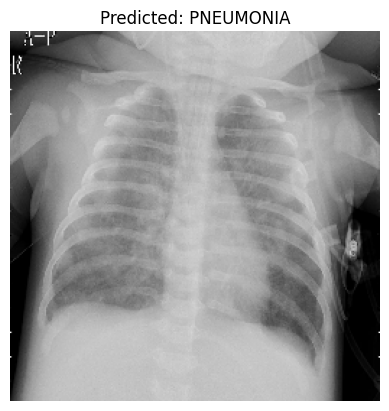

In [57]:
image_path = '/content/pneumonia/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg'
predict_image(image_path)

In [58]:
y_pred=model.predict(val_data)

1/1 [==============================] - 0s 186ms/step


In [59]:
print(y_pred)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
